In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading All dataset, 10,000 records
data_set = pd.read_csv("heart_disease.csv")
data_set

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [86]:
# data_set = data_set[data_set['Age'] <= 30]

# print(data_set.shape)
# Calculate the number of missing values in each column of the filtered DataFrame
missing_data_set = data_set.isna().sum()

# # Display the result
missing_data_set


Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [87]:
# Select only the numeric columns (float64 and int64) from the filtered DataFrame
numeric_cols = data_set.select_dtypes(include=['float64', 'int64'])

# Calculate the number of missing values in each numeric column
# numeric_cols_missing = numeric_cols.isna().sum()

# Display the result

In [88]:
data_set.loc[:, numeric_cols.columns] = numeric_cols.apply(lambda col: col.fillna(col.mean()))
summary_stats = data_set.describe().T

In [89]:
print(data_set.shape)
data_set = data_set.dropna()
# Check the number of rows and columns
print(data_set.shape)

# data_set.to_csv("heart_disease_cleaned.csv", index=False)


(10000, 21)
(7229, 21)


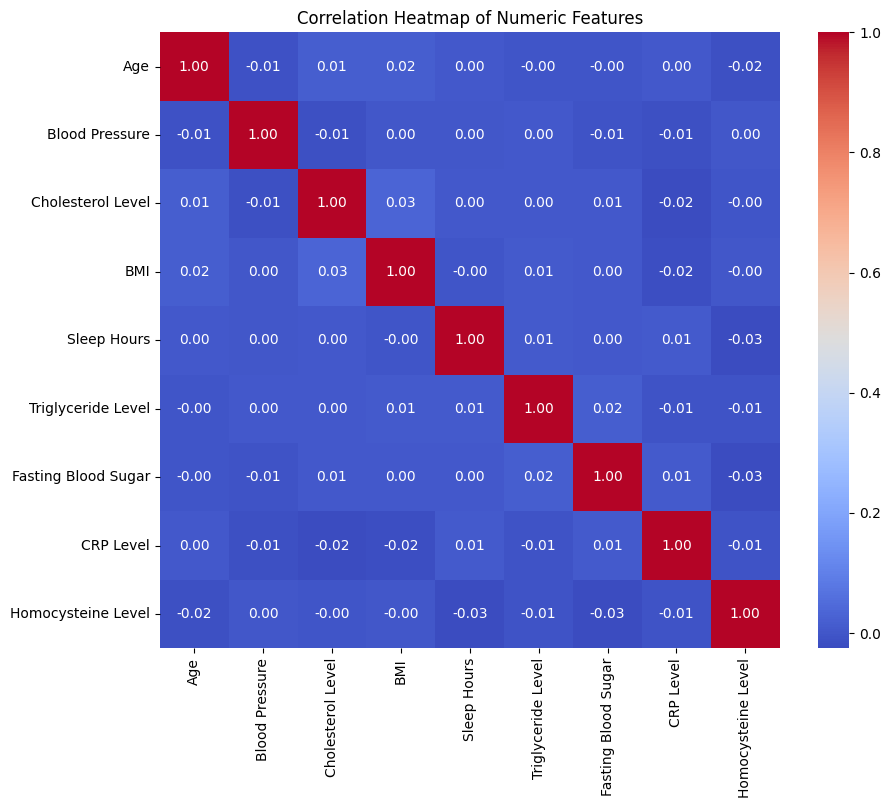

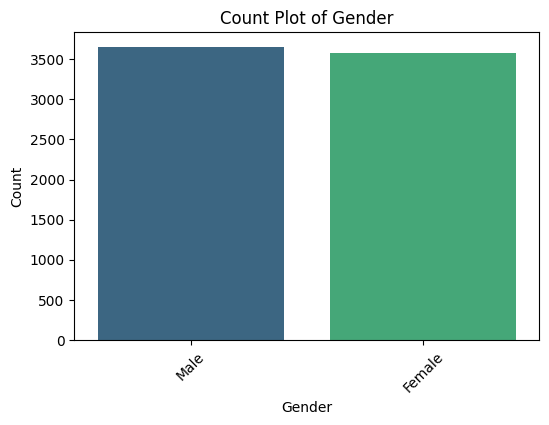

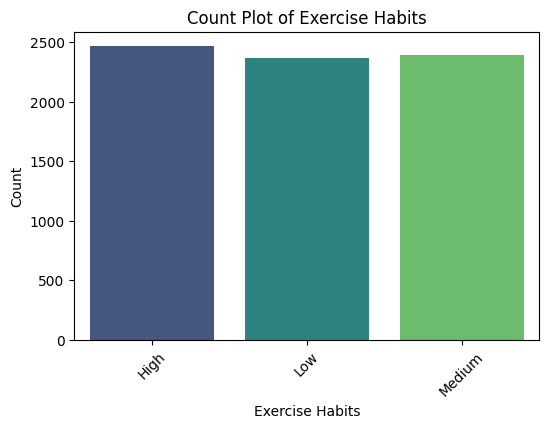

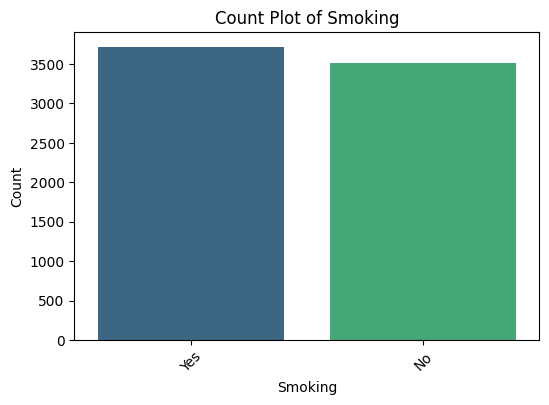

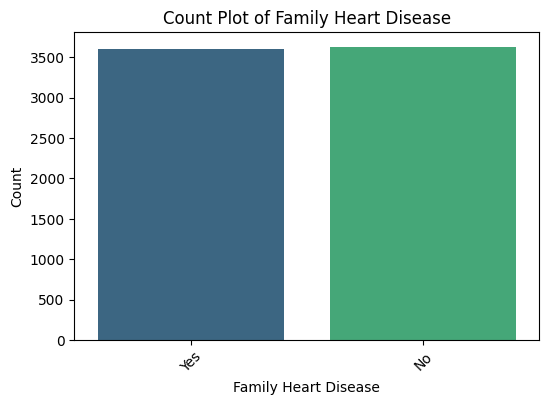

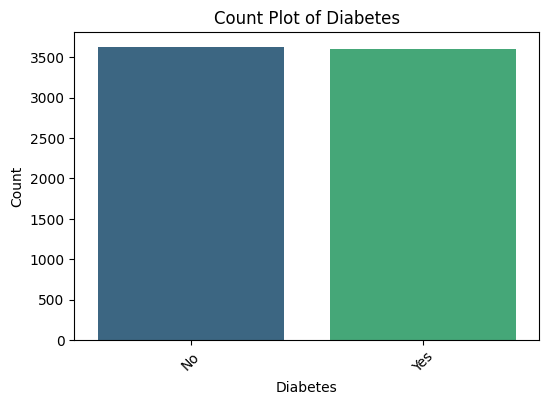

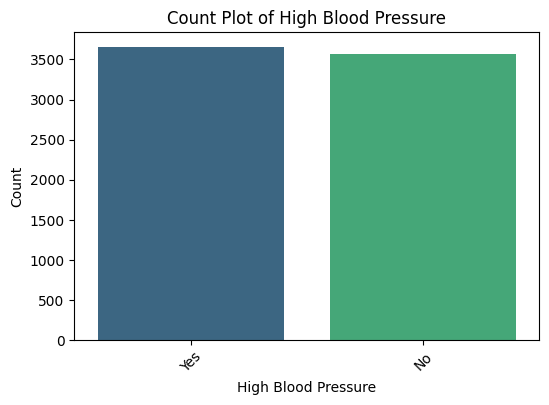

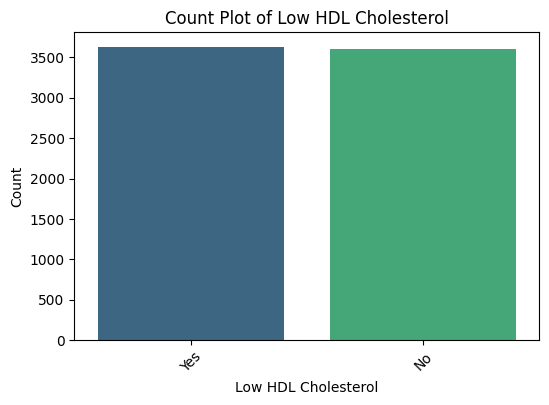

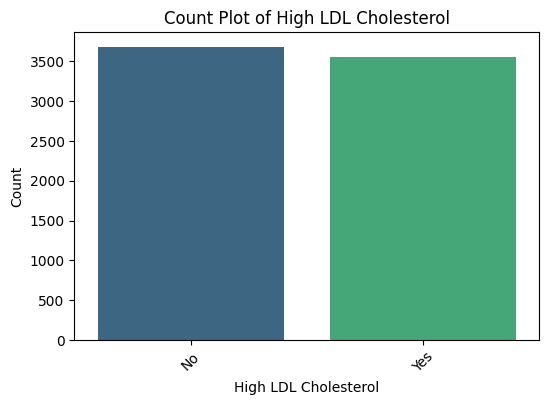

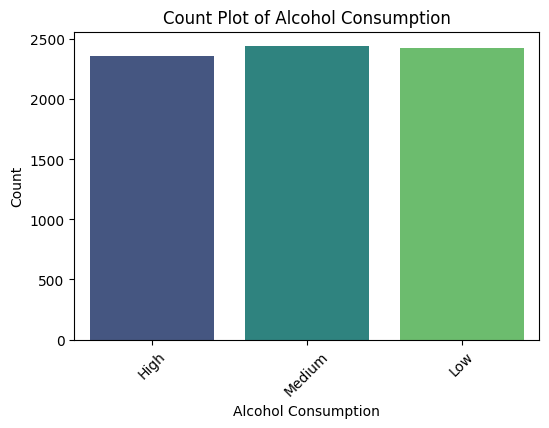

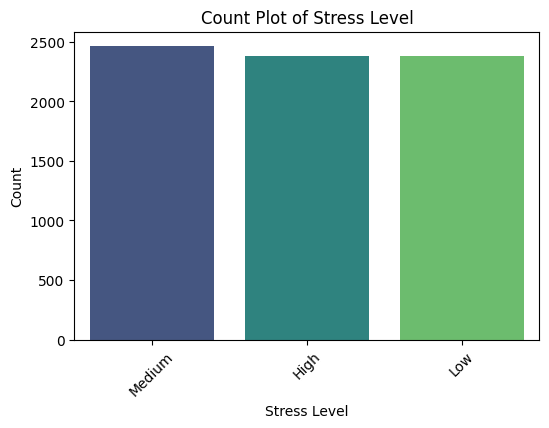

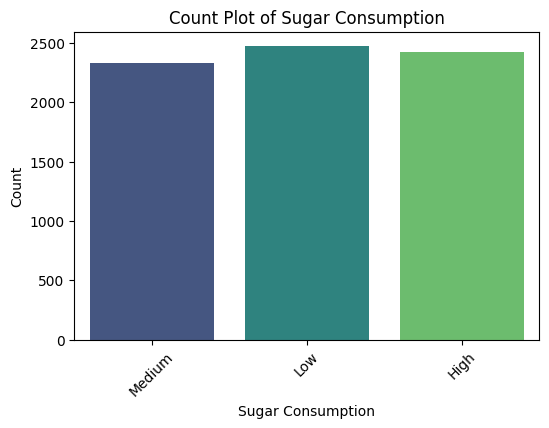

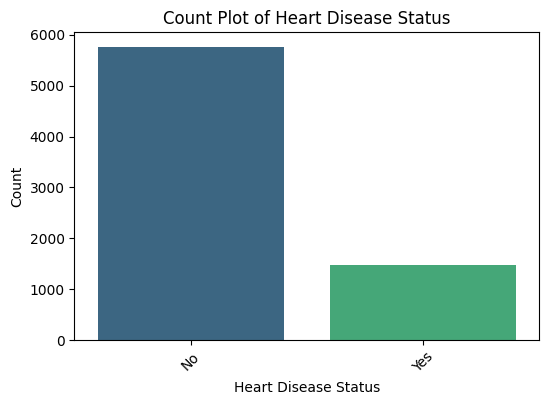

In [90]:
# Create a correlation heatmap of numeric variables if there are four or more numeric columns
numeric_data_set = data_set.select_dtypes(include=[np.number])
if numeric_data_set.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data_set.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# # Create pair plot for numeric variables to examine distributions and relationships
# sns.pairplot(numeric_data_set)
# plt.suptitle('Pair Plot for Numeric Features', y=1.02)
# plt.show()

# # Plot histograms for select numeric columns
# numeric_columns = numeric_data_set.columns
# for col in numeric_columns:
#     plt.figure(figsize=(10, 8))
#     sns.histplot(data_set[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

# For categorical variables, display count plots
categorical_cols = data_set.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data_set, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

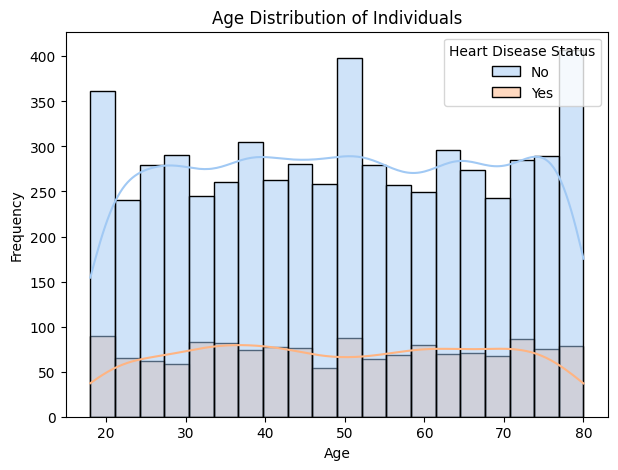

In [91]:
# Set the figure size
plt.figure(figsize=(7, 5))

# Create a histogram with KDE and hue for 'Heart Disease Status'
sns.histplot(
    x=data_set['Age'], 
    kde=True, 
    hue=data_set['Heart Disease Status'],
    palette='pastel'  # Changed color palette
)

# Add title and axis labels
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Display the plot
plt.show()

In [92]:
#Select all the categorical columns
categorical_data = [single_column for single_column in data_set.columns if data_set[single_column].dtypes == "O"]
categorical_data

['Gender',
 'Exercise Habits',
 'Smoking',
 'Family Heart Disease',
 'Diabetes',
 'High Blood Pressure',
 'Low HDL Cholesterol',
 'High LDL Cholesterol',
 'Alcohol Consumption',
 'Stress Level',
 'Sugar Consumption',
 'Heart Disease Status']

In [93]:
multi_cat_o = [] # More than 2 categories
binary_cat_o = [] # Just 2 columns
for i in categorical_data:
    if len(data_set[i].value_counts())>2:
        multi_cat_o.append(i)
    else:
        binary_cat_o.append(i)

print(f'Multiple Categories: {multi_cat_o} \n\n\n')
print(f'Binary Categories: {binary_cat_o} \n\n\n')

Multiple Categories: ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption'] 



Binary Categories: ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status'] 





In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
for i in binary_cat_o:
    data_set[i] = label_encoder.fit_transform(data_set[i])

onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform all categorical columns at once
multi_cat_encoded = onehot.fit_transform(data_set[multi_cat_o])

# Get feature names
feature_names = onehot.get_feature_names_out(multi_cat_o)

multiple_encoded = pd.DataFrame(multi_cat_encoded, columns=feature_names)

# # Convert to DataFrame
# df = pd.DataFrame(multi_cat_encoded, columns=feature_names)
data_set = data_set.drop(columns=multi_cat_o).reset_index(drop=True)

data_set

data_set = pd.concat([data_set, multiple_encoded], axis=1)

data_set

,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,...,Exercise Habits_Medium,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_High,Stress Level_Low,Stress Level_Medium,Sugar Consumption_High,Sugar Consumption_Low,Sugar Consumption_Medium
0,56.0,1,153.0,155.0,1,1,0,24.991591,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,69.0,0,146.0,286.0,0,1,1,25.221799,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,46.0,1,126.0,216.0,0,0,0,29.855447,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32.0,0,122.0,293.0,1,1,0,24.130477,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,60.0,1,166.0,242.0,1,1,1,20.486289,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,68.0,0,169.0,291.0,1,0,0,22.839718,0,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7225,73.0,0,144.0,191.0,1,1,1,39.459620,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7226,25.0,0,136.0,243.0,1,0,0,18.788791,1,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7227,23.0,1,142.0,299.0,1,0,1,34.964026,1,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [95]:
X = data_set.drop(columns = "Heart Disease Status", axis=1)
Y= data_set["Heart Disease Status"]

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X_train.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(5783, 28)


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# Select features and target column
X = data_set.drop(columns=['Heart Disease Status'])
y = data_set['Heart Disease Status']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN model with weighted distances
k = 13 # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# print(f'KNN Accuracy: {accuracy:.2f}')
# print(classification_report(y_test, y_pred))

# Function to predict new data from a file
def predict_new_data(new_data_path, threshold=0.4):
    new_data = pd.read_csv(new_data_path)
    new_data = new_data.drop(columns=['Heart Disease Status'], errors='ignore')  # Ensure target column is removed if present
    new_data = scaler.transform(new_data)  # Apply the same scaling
    probs = knn.predict_proba(new_data)[:, 1]  # Get probability for class 1
    return (probs > threshold).astype(int)

# Function to predict from a DataFrame
def predict_from_dataframe(df, threshold=0.4):
    df = scaler.transform(df)  # Apply the same scaling
    probs = knn.predict_proba(df)[:, 1]  # Get probability for class 1
    prediction = (probs > threshold).astype(int)
    if prediction[0] == 0:
        return "🎊 No Heart Disease"
    else:
        return "🚑 Heart Disease Detected"

# Example usage:
# predictions = predict_new_data("new_heart_disease_data.csv")
# print(predictions)

In [98]:
sample_data = pd.DataFrame({
  'Age': [45.0],
  'Gender': [1],  # Male
  'Blood Pressure': [140.0],
  'Cholesterol Level': [220.0],
  'Smoking': [0],  # Non-smoker
  'Family Heart Disease': [1],  # Has family history
  'Diabetes': [0],  # No diabetes
  'BMI': [28.5],
  'High Blood Pressure': [0],
  'Low HDL Cholesterol': [1],
  'High LDL Cholesterol': [1],
  'Sleep Hours': [7.0],
  'Triglyceride Level': [245.0],
  'Fasting Blood Sugar': [115.0],
  'CRP Level': [7.0],
  'Homocysteine Level': [12.0],
  'Exercise Habits_High': [1.0],
  'Exercise Habits_Low': [0.0],
  'Exercise Habits_Medium': [0.0],
  'Alcohol Consumption_High': [0.0],
  'Alcohol Consumption_Low': [1.0],
  'Alcohol Consumption_Medium': [0.0],
  'Stress Level_High': [0.0],
  'Stress Level_Low': [1.0],
  'Stress Level_Medium': [0.0],
  'Sugar Consumption_High': [0.0],
  'Sugar Consumption_Low': [1.0],
  'Sugar Consumption_Medium': [0.0]
})
result = predict_from_dataframe(sample_data)
print(result)

🎊 No Heart Disease


In [99]:
# Example for a single DataFrame input:
sample_data = pd.DataFrame({
    'Age': [28.0],  # Low age
    'Gender': [1],  # Male
    'Blood Pressure': [170.0],  # Very high blood pressure
    'Cholesterol Level': [320.0],  # Significantly high cholesterol
    'Smoking': [1],  # Smoker
    'Family Heart Disease': [1],  # Has family history
    'Diabetes': [1],  # Has diabetes
    'BMI': [38.0],  # Severely obese
    'High Blood Pressure': [1],
    'Low HDL Cholesterol': [1],
    'High LDL Cholesterol': [1],
    'Sleep Hours': [4.0],  # Very poor sleep
    'Triglyceride Level': [400.0],  # Very high triglycerides
    'Fasting Blood Sugar': [180.0],  # Significantly high fasting blood sugar
    'CRP Level': [15.0],  # Very high inflammation marker
    'Homocysteine Level': [22.0],  # Very high homocysteine
    'Exercise Habits_High': [0.0],
    'Exercise Habits_Low': [1.0],  # Low exercise
    'Exercise Habits_Medium': [0.0],
    'Alcohol Consumption_High': [1.0],  # High alcohol consumption
    'Alcohol Consumption_Low': [0.0],
    'Alcohol Consumption_Medium': [0.0],
    'Stress Level_High': [1.0],  # High stress
    'Stress Level_Low': [0.0],
    'Stress Level_Medium': [0.0],
    'Sugar Consumption_High': [1.0],  # High sugar consumption
    'Sugar Consumption_Low': [0.0],
    'Sugar Consumption_Medium': [0.0]
})
result = predict_from_dataframe(sample_data)
print(result)

🚑 Heart Disease Detected
